In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"e11.csv")

In [6]:
print(df.describe())

           c2           c3           c4           c5           c6  \
count  1025.0  1025.000000  1025.000000  1025.000000  1025.000000   
mean      2.0   171.061049   168.322977     0.563291     1.509533   
std       0.0     8.329791     4.963322     0.185887     0.673348   
min       2.0   140.654193   128.004425     0.000000     0.037662   
25%       2.0   166.407062   166.863934     0.410097     0.991921   
50%       2.0   172.887592   169.176483     0.609396     1.467761   
75%       2.0   176.347090   170.942968     0.710838     2.013017   
max       2.0   189.867702   177.218128     0.887362     2.834391   

                c7           c8           c9          c10          c11  ...  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  ...   
mean      2.349020    20.188791     8.058601     0.650262    58.340911  ...   
std       0.220502     1.226728     1.175814     0.068097     3.353027  ...   
min       0.000000     0.000000     0.000000     0.019441     

In [7]:
print(df.info())
selected_columns = ['c51', 'c52', 'c53', 'c54']
print(df[selected_columns].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Columns: 240 entries, c1 to c241
dtypes: float64(213), int64(6), object(21)
memory usage: 1.9+ MB
None
               c51          c52          c53          c54
count  1025.000000  1025.000000  1025.000000  1025.000000
mean      9.386951     9.107622     9.826083     9.183064
std       2.727216     2.221227     6.404334     5.815800
min       5.349020     5.561128     3.360440     3.415696
25%       7.072191     7.479233     4.715955     5.022661
50%       8.632913     8.528042     7.912618     7.328208
75%      11.680609    10.330523    12.232832    10.767166
max      17.690811    14.933549    27.343699    25.956472


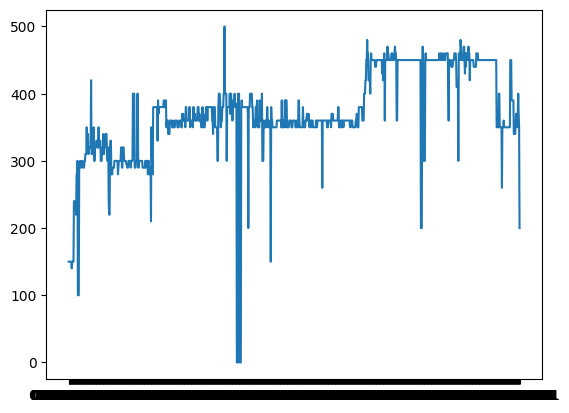

In [8]:
plt.plot(df['c1'], df['c161'])

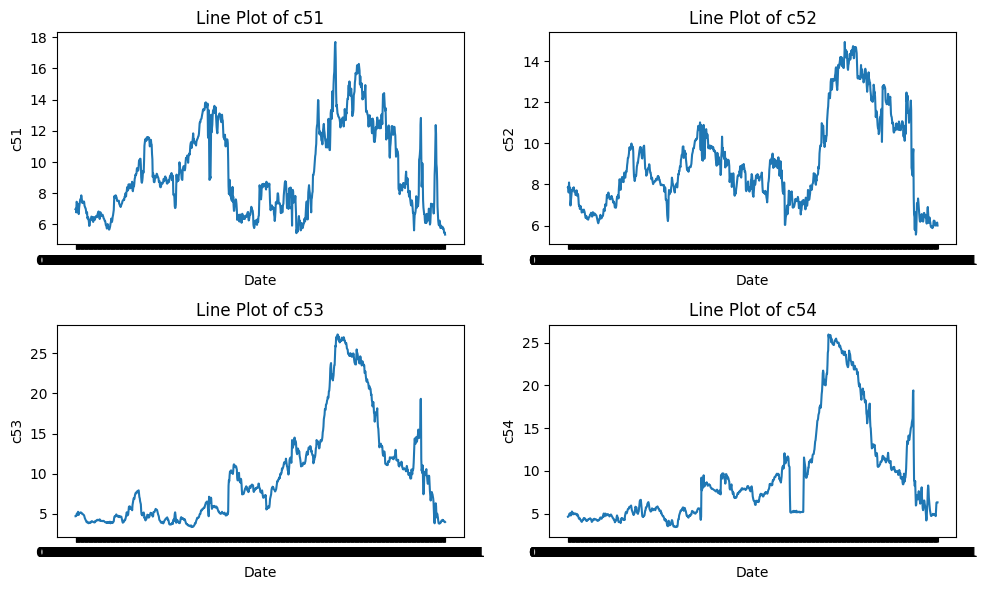

In [9]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(selected_columns, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 subplots
    plt.plot(df['c1'], df[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
plt.tight_layout()  # Adjust spacing between subplots for better layout
plt.show()

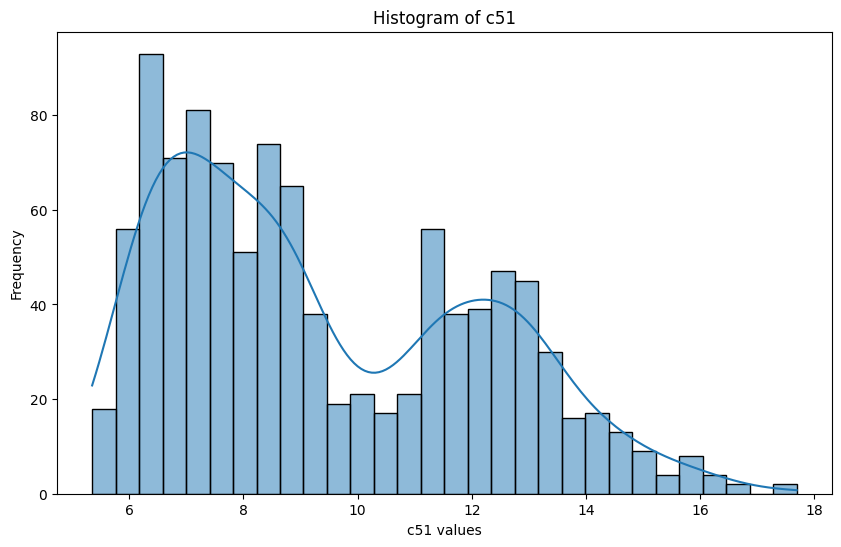

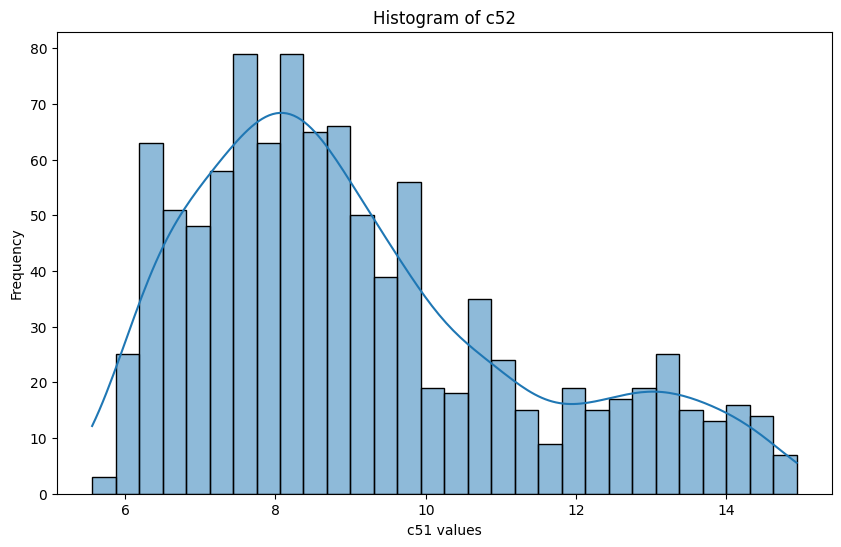

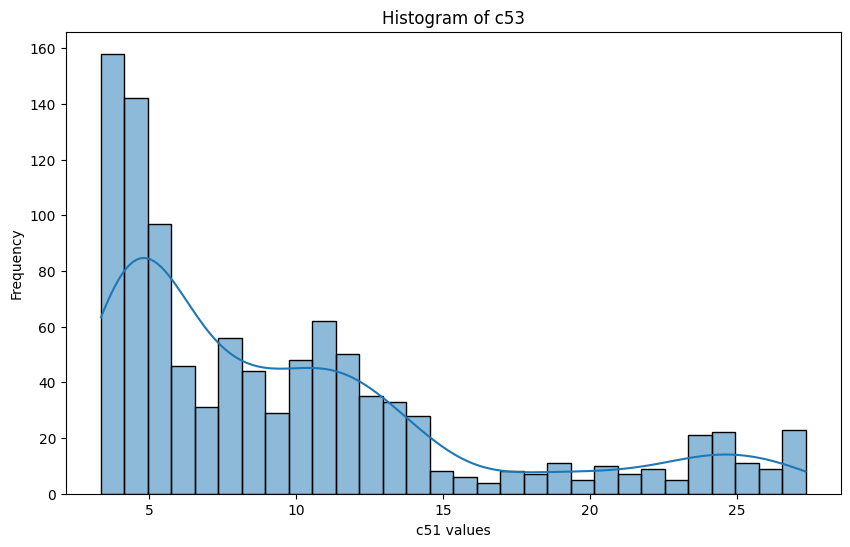

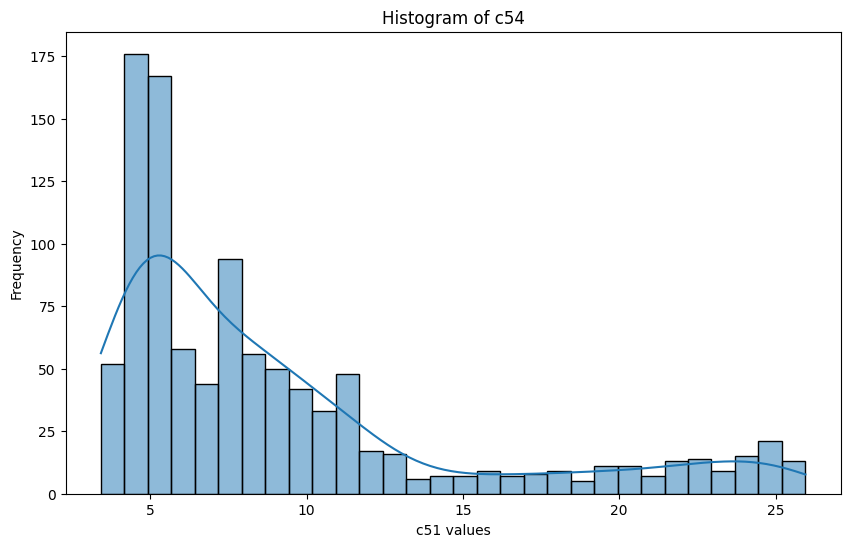

In [10]:
for i, column in enumerate(selected_columns, start=1):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel('c51 values')
    plt.ylabel('Frequency')
    plt.show()

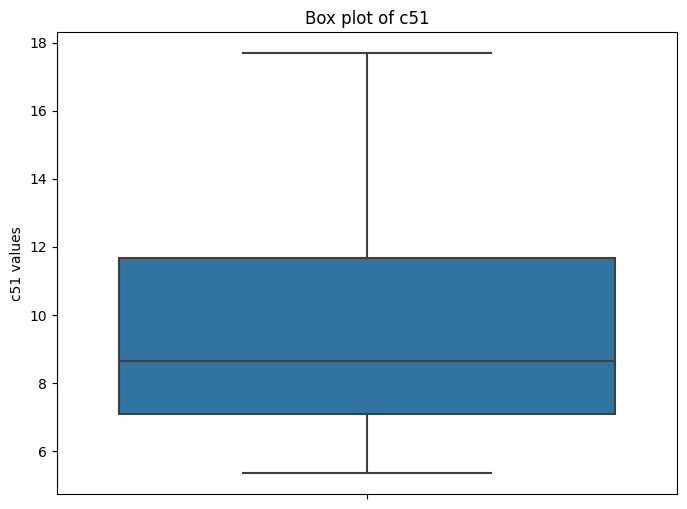

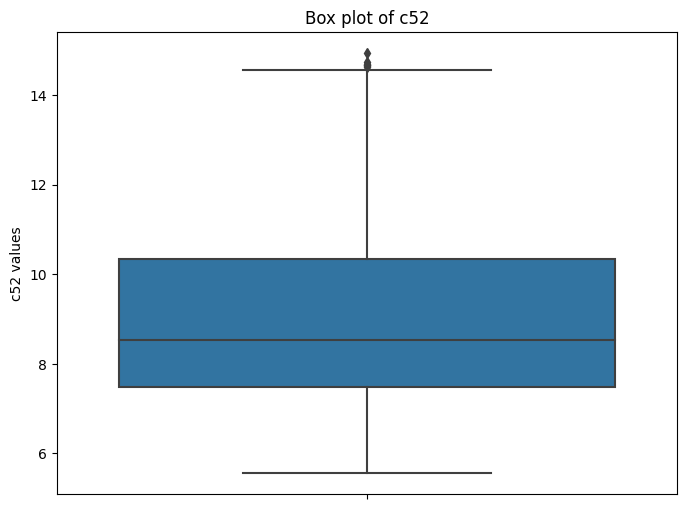

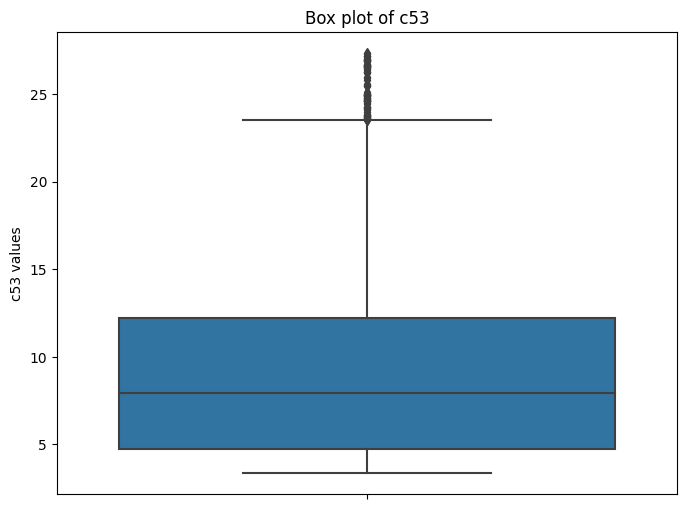

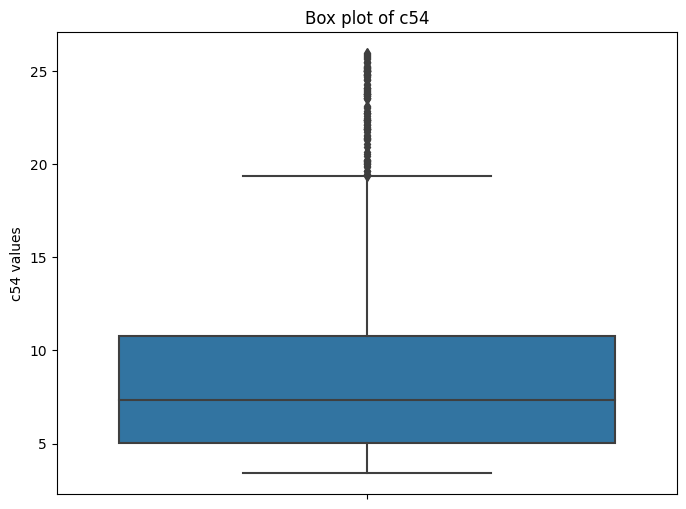

In [11]:
for i, column in enumerate(selected_columns, start=1):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column], data=df)
    plt.title(f'Box plot of {column}')
    plt.ylabel(f'{column} values')
    plt.show()

In [12]:
# Assuming your DataFrame is named df

# Define a function to replace non-numeric characters and empty cells with -999
def replace_non_numeric(value):
    if pd.isna(value) or value == '':
        # Replace empty cells with -999
        return -999
    try:
        # Try to convert the value to numeric
        numeric_value = pd.to_numeric(value)
        return numeric_value
    except:
        # If conversion fails, replace non-numeric characters with -999
        return -999

# Apply the custom function to all columns (except 'c1')
df.loc[:, df.columns != 'c1'] = df.loc[:, df.columns != 'c1'].apply(lambda x: x.map(replace_non_numeric))

# Now, non-numeric characters and empty cells in all columns (except 'c1') have been replaced with -999 while retaining existing numeric values

In [13]:
# Assuming your DataFrame is named df
# Save the DataFrame to a CSV file
df.to_csv('output_file_replaced alphabet character-3.csv', index=False)


In [14]:
# Calculate the threshold for dropping columns (more than 70% -999 values)
threshold = 0.7 * len(df)

# Drop columns where more than 70% of the cells are -999
df_clean = df.drop(df.columns[df.apply(lambda col: col.value_counts().get(-999, 0) > threshold)], axis=1)



In [15]:
num_columns = df_clean.shape[1]
print("Number of columns in df_clean:", num_columns)

Number of columns in df_clean: 231


In [16]:
# List columns before and after dropping
original_columns = df.columns
cleaned_columns = df_clean.columns

# Get the names of dropped columns
dropped_columns = list(set(original_columns) - set(cleaned_columns))

# Print the names of dropped columns
print("Dropped Columns:", dropped_columns)

Dropped Columns: ['c229', 'c199', 'c206', 'c226', 'c189', 'c190', 'c202', 'c188', 'c204']


In [17]:

# Create an empty list to store feature names and their count of -999
feature_counts = []

# Calculate the count of -999 for each feature and store it in the list
for column in df.columns:
    count_minus_999 = (df[column] == -999).sum()
    feature_counts.append({'Feature': column, 'Count of -999': count_minus_999})

# Create a DataFrame from the list of dictionaries
feature_counts_df = pd.DataFrame(feature_counts)

# Display the resulting DataFrame
feature_counts_df


,Feature,Count of -999
0,c1,0
1,c2,0
2,c3,0
3,c4,0
4,c5,0
...,...,...
235,c236,0
236,c237,0
237,c238,0
238,c239,0


In [18]:
feature_counts_df.to_csv('features-count-2.csv', index=False)

In [19]:
df_clean.to_csv('df_clean_after_dropping columns-2.csv', index=False)

In [20]:
from sklearn.impute import SimpleImputer
# Replace -999 values with np.nan in the entire DataFrame
df_clean.replace(-999, np.nan, inplace=True)

# Identify numeric columns for imputation (excluding the timestamp column)
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numeric columns using median strategy
imputer = SimpleImputer(strategy='median')
df_clean[numeric_columns] = imputer.fit_transform(df_clean[numeric_columns])

# Now, all missing values (including -999) should be imputed with the median



In [21]:
df_clean.to_csv('df_clean_after_imputing-2.csv', index=False)

In [22]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot grid with 2 rows and 2 columns
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=('c51', 'c52', 'c53', 'c54'))

# Add traces for each column 'c51' to 'c54' in the subplot grid
for i, column_name in enumerate(['c51', 'c52', 'c53', 'c54']):
    row_num = i // 2 + 1  # Row number for subplot
    col_num = i % 2 + 1   # Column number for subplot
    
    # Create a trace for the current column and add it to the subplot grid
    trace = go.Scatter(x=df_clean['c1'], y=df_clean[column_name], mode='lines', name=column_name)
    fig.add_trace(trace, row=row_num, col=col_num)

# Update subplot layout
fig.update_layout(title='Graphs for Columns c51 to c54 (from df_clean)', showlegend=True, height=600, width=800)

# Show the figure
fig.show()



In [23]:
# Define the column names you want to work with
# Get the column names of your cleaned DataFrame
column_names = df_clean.columns.tolist()

# Exclude 'c1' from the list of column names if it's present
if 'c1' in column_names:
    column_names.remove('c1')



# Create an empty DataFrame to store the results
new_df = pd.DataFrame()

# Define the step size (50 data points at a time)
step_size = 60

# ... (previous code remains unchanged)

for column_name in column_names:
    column_data = df_clean[column_name]  # Get the data for the current column
    new_column_data = []  # Create an empty list to store modified data
    
    for i in range(0, len(column_data), step_size):
        # Get the current 50 data points
        data_subset = column_data.iloc[i:i+step_size].copy()
        
        # Calculate the IQR for the current subset
        q1 = np.percentile(data_subset, 25)
        q3 = np.percentile(data_subset, 75)
        iqr = q3 - q1
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = q1 - 1.0 * iqr
        upper_bound = q3 + 1.0 * iqr
        # Calculate mean for non-outliers within the subset
        subset_mean = data_subset[(data_subset >= lower_bound) & (data_subset <= upper_bound)].mean()
        # Replace outliers with the mean of the 50 data points
        data_subset[data_subset < lower_bound] = subset_mean
        data_subset[data_subset > upper_bound] = subset_mean
        
        # Explicitly cast subset_mean to int before appending to the new_column_data list
        subset_mean = int(subset_mean)
        
        # Append the modified data to the new_column_data list
        new_column_data.extend(data_subset)
    
    # Convert the new_column_data list to a Series
    new_column_series = pd.Series(new_column_data, name=column_name)
    
    # Concatenate the new column to the new_df DataFrame
    new_df = pd.concat([new_df, new_column_series], axis=1)

# Now, new_df contains your data with outliers replaced by the mean within each 50-point segment


In [24]:
# ... (your previous code for processing columns)

# Add 'c1' column back to the new_df DataFrame at the front
new_df = pd.concat([df_clean['c1'], new_df], axis=1)

# Now, new_df contains your data with 'c1' column added at the front.



In [25]:
new_df.to_csv('df_clean_after_removing_outliers.csv', index=False)

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

selected_columns = ['c51', 'c52', 'c53', 'c54']

# Create a subplot with 2 rows and 2 columns
fig = make_subplots(rows=2, cols=2)

for i, (column) in enumerate((selected_columns), start=1):
    # Calculate the row and column indices for the subplot
    row_index = (i - 1) // 2 + 1
    col_index = (i - 1) % 2 + 1

    # Add a scatter trace for the data from df
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=f'Data from df[{column}]', line=dict(color='blue')), row=row_index, col=col_index)
    
    # Add a scatter trace for the data from new_df
    fig.add_trace(go.Scatter(x=new_df.index, y=new_df[column], mode='lines', name=f'Data from new_df[{column}]', line=dict(color='red', dash='dash')), row=row_index, col=col_index)
    
    # Set subplot title and axis labels
    fig.update_xaxes(title_text='Date', row=row_index, col=col_index)
    fig.update_yaxes(title_text=column, row=row_index, col=col_index)
    fig.update_layout(title_text=f'Line Plot of {column}', showlegend=True)

# Adjust subplot layout
fig.update_layout(height=1000, width=1000, title_text="Subplots with Multiple Graphs")
fig.update_layout(showlegend=True)
fig.show()